In [69]:
import pandas as pd 
import numpy as np

In [70]:
data = pd.read_csv("WPA_DataCase_2024.csv")

In [71]:
orgs = data.DEMO_Org.unique()

In [72]:
datas = {}

In [73]:
for org in orgs:
    datas[org] = data[data.DEMO_Org == org]

In [74]:
for org in orgs:
    datas[org].to_excel(f"{org}.xlsx")

In [75]:
datas[orgs[1]].head()

,DEMO_Org,DEMO_meeting_remote,DEMO_Dept,OBSV_PreC_Location_A_primryoffice,OBSV_PreC_Location_B_officeother,OBSV_PreC_Location_C_client,OBSV_PreC_Location_D_WFH,OBSV_PreC_Location_E_publicspace,OBSV_PreC_Location_F_transit,OBSV_PreC_Location_G_other,...,DECSN_factors_C_WrkLifeSep,DECSN_factors_D_safety,OBSV_Now_WrkTimeA_Indiv_fract_vCollab,OBSV_PreC_meetingsize0ffice_D_10plus,PREF_space_B_inperson_collab,PREF_space_C_videoconf,PREF_space_D_impromptu,PREF_space_E_recharge,PREF_space_F_accessible,PREF_space_G_firstarrive
4,Org 3,No,Accounting,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,NaN,0.875,NaN,Elsewhere in the building,Elsewhere in the building,Elsewhere in the building,Elsewhere in the building,Desk or office,Desk or office
5,Org 3,No,Accounting,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.5,NaN,0.875,0.2,"Semi-enclosed space (nook, booth)","Enclosed room (meeting room, phone room)","Enclosed room (meeting room, phone room)","Open space (cafe, lounge)","Open space (cafe, lounge)","Open space (cafe, lounge)"
8,Org 3,No,Accounting,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,NaN,0.975,NaN,Desk or office,Home,Desk or office,Home,Desk or office,"Open space (cafe, lounge)"
9,Org 3,Yes,Accounting,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,NaN,0.875,NaN,"Enclosed room (meeting room, phone room)",Desk or office,"Open space (cafe, lounge)",Anywhere outside the office building,"Semi-enclosed space (nook, booth)",Desk or office
10,Org 3,No,Accounting,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,NaN,0.875,NaN,"Enclosed room (meeting room, phone room)",Home,"Enclosed room (meeting room, phone room)",Home,Home,Home


In [76]:
datas[orgs[0]].columns[datas[orgs[0]].isna().sum() == datas[orgs[0]].shape[0]]

Index(['DEMO_meeting_remote', 'OBSV_PreC_Location_C_client',
       'OBSV_PreC_Location_E_publicspace', 'OBSV_PreC_Location_F_transit',
       'OBSV_Now_Interact_Work_within_org', 'OBSV_PreC_interative_A_inperson',
       'OBSV_PreC_interative_B_remote', 'OBSV_PreC_meetingsize0ffice_A_1',
       'OBSV_PreC_meetingsize0ffice_B_2n3',
       'OBSV_PreC_meetingsize0ffice_C_4n9',
       ...
       'DEMO_Tenure_PreC_employee', 'PREF_WFK_rate_home',
       'PostC_impact_shift_G_teammeetings', 'DECSN_factors_A_noinpersonmtgs',
       'OBSV_PreC_meetingsize0ffice_D_10plus', 'PREF_space_C_videoconf',
       'PREF_space_D_impromptu', 'PREF_space_E_recharge',
       'PREF_space_F_accessible', 'PREF_space_G_firstarrive'],
      dtype='object', length=121)

In [77]:
datas[orgs[0]].shape

(130, 185)

In [78]:
sum(datas[orgs[0]].isna().sum() != datas[orgs[0]].shape[0])

64

In [79]:
orgs[0]

'Org 2'

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
corr = datas[orgs[0]].select_dtypes('number').corr()

In [82]:
corr

,OBSV_PreC_Location_A_primryoffice,OBSV_PreC_Location_B_officeother,OBSV_PreC_Location_C_client,OBSV_PreC_Location_D_WFH,OBSV_PreC_Location_E_publicspace,OBSV_PreC_Location_F_transit,OBSV_PreC_Location_G_other,OBSV_Now_Interact_Work_within_org,OBSV_PreC_meeting_A_inperson,OBSV_PreC_meeting_B_hyrbid,...,PostC_impact_shift_H_social,PostC_impact_shift_I_managersconnect,PostC_impact_shift_J_client,PostC_impact_shift_K_enjoy,DECSN_factors_A_noinpersonmtgs,DECSN_factors_B_healthwellness,DECSN_factors_C_WrkLifeSep,DECSN_factors_D_safety,OBSV_Now_WrkTimeA_Indiv_fract_vCollab,OBSV_PreC_meetingsize0ffice_D_10plus
OBSV_PreC_Location_A_primryoffice,1.000000,-0.152231,NaN,-0.619358,NaN,NaN,-0.202626,NaN,0.179888,-0.084884,...,0.435596,0.423358,0.374209,0.542023,NaN,-0.455480,-0.038899,-0.162175,0.017602,NaN
OBSV_PreC_Location_B_officeother,-0.152231,1.000000,NaN,-0.276042,NaN,NaN,0.105642,NaN,-0.034389,0.121414,...,0.267244,0.100257,-0.059691,0.141542,NaN,0.011545,-0.044159,-0.187257,-0.251989,NaN
OBSV_PreC_Location_C_client,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OBSV_PreC_Location_D_WFH,-0.619358,-0.276042,NaN,1.000000,NaN,NaN,-0.634299,NaN,0.010077,-0.137067,...,-0.449391,-0.270191,-0.125718,-0.317661,NaN,0.277384,0.106236,0.096604,0.176650,NaN
OBSV_PreC_Location_E_publicspace,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DECSN_factors_B_healthwellness,-0.455480,0.011545,NaN,0.277384,NaN,NaN,0.106425,NaN,-0.068645,0.073434,...,-0.316340,-0.405939,-0.226998,-0.560056,NaN,1.000000,0.343327,0.377136,0.173476,NaN
DECSN_factors_C_WrkLifeSep,-0.038899,-0.044159,NaN,0.106236,NaN,NaN,0.120005,NaN,0.070329,0.002347,...,-0.114252,-0.033093,-0.005224,-0.061537,NaN,0.343327,1.000000,0.244926,0.126742,NaN
DECSN_factors_D_safety,-0.162175,-0.187257,NaN,0.096604,NaN,NaN,0.142392,NaN,0.059107,-0.128396,...,-0.316009,-0.188546,0.053274,-0.319262,NaN,0.377136,0.244926,1.000000,0.288572,NaN
OBSV_Now_WrkTimeA_Indiv_fract_vCollab,0.017602,-0.251989,NaN,0.176650,NaN,NaN,-0.245442,NaN,0.135481,0.042105,...,-0.161373,-0.112345,0.090596,-0.155425,NaN,0.173476,0.126742,0.288572,1.000000,NaN


<Axes: >

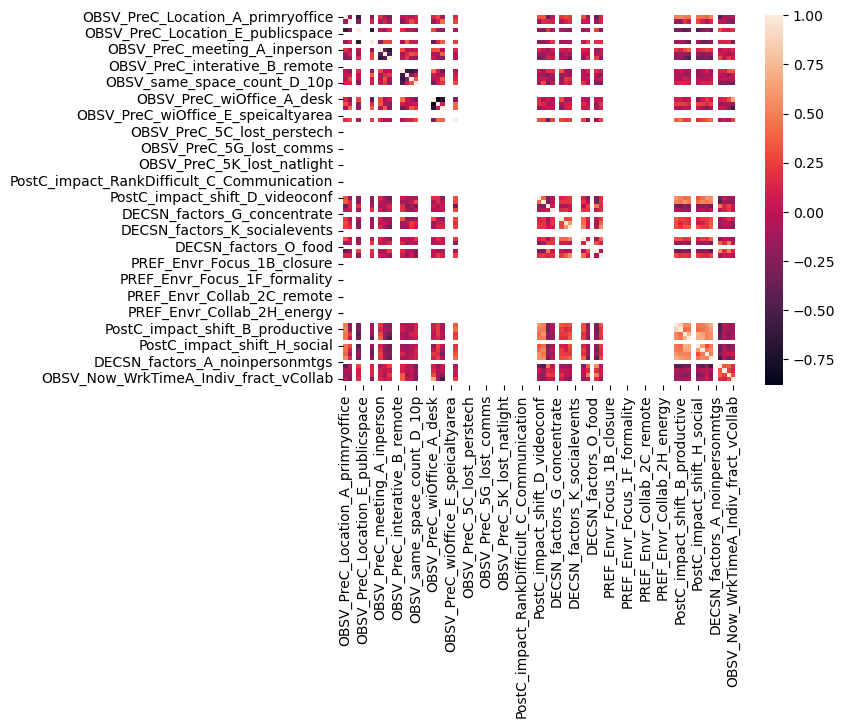

In [83]:
sns.heatmap(corr)

In [84]:
for org in orgs:
    datas[org] = datas[org][datas[org].columns[datas[org].isna().sum() != datas[org].shape[0]]]

In [85]:
for org in orgs:
    datas[org].to_excel(f"{org}.xlsx")

In [86]:
cols = []
for og in orgs:
    cols.append(datas[og].columns)

In [87]:
common = list(set.intersection(*map(set,cols)))

In [58]:
common

['PREF_features_S_relax',
 'PostC_impact_shift_C_collab',
 'PREF_features_M_lockers',
 'DEMO_Dept',
 'PREF_features_O_food',
 'PREF_space_B_inperson_collab',
 'PREF_space_A_focusedWk',
 'PREF_features_R_gym',
 'PREF_features_C_concentration',
 'DEMO_Org',
 'PREF_features_T_greenspace',
 'PREF_features_N_events']

In [59]:
common_qs = data[common] 

In [88]:
common_qs

,PREF_features_S_relax,PostC_impact_shift_C_collab,PREF_features_M_lockers,DEMO_Dept,PREF_features_O_food,PREF_space_B_inperson_collab,PREF_space_A_focusedWk,PREF_features_R_gym,PREF_features_C_concentration,DEMO_Org,PREF_features_T_greenspace,PREF_features_N_events
0,Very unimportant,5.0,Neutral,Accounting,Important,"Enclosed room (meeting room, phone room)","Enclosed room (meeting room, phone room)",Very unimportant,Important,Org 2,Very unimportant,Very unimportant
1,Unimportant,2.5,Unimportant,Accounting,Important,Workstation,"Enclosed room (meeting room, phone room)",Very important,Important,Org 2,Unimportant,Unimportant
2,Neutral,2.5,Very unimportant,Accounting,Important,"Enclosed room (meeting room, phone room)",Workstation,Unimportant,Very important,Org 2,Important,Very unimportant
3,Unimportant,4.0,Unimportant,Accounting,Unimportant,"Enclosed room (meeting room, phone room)","Enclosed room (meeting room, phone room)",Unimportant,Very important,Org 2,Important,Important
4,Very unimportant,2.5,Very unimportant,Accounting,Very unimportant,Elsewhere in the building,Desk or office,Very unimportant,Very unimportant,Org 3,Very unimportant,Very unimportant
...,...,...,...,...,...,...,...,...,...,...,...,...
1379,Very unimportant,5.0,Very unimportant,Workplace & Tech Services,Very unimportant,"Enclosed room (meeting room, phone room)","Enclosed room (meeting room, phone room)",Very unimportant,Very unimportant,Org 5,Very unimportant,Very unimportant
1380,Very unimportant,4.0,Very unimportant,Workplace & Tech Services,Very unimportant,"Enclosed room (meeting room, phone room)","Semi-enclosed space (nook, booth)",Very unimportant,Very unimportant,Org 3,Very unimportant,Very unimportant
1381,Very unimportant,2.5,Very unimportant,Workplace & Tech Services,Very unimportant,"Enclosed room (meeting room, phone room)","Semi-enclosed space (nook, booth)",Very unimportant,Very unimportant,Org 3,Very unimportant,Very unimportant
1382,Very unimportant,5.0,Very unimportant,Workplace & Tech Services,Very unimportant,"Enclosed room (meeting room, phone room)","Enclosed room (meeting room, phone room)",Very unimportant,Very unimportant,Org 5,Very unimportant,Very unimportant


In [64]:
common_qs.to_excel("common question.xlsx")

In [65]:
common_qs.shape

(1384, 12)

In [66]:
common_qs.isna().sum()

PREF_features_S_relax            0
PostC_impact_shift_C_collab      6
PREF_features_M_lockers          0
DEMO_Dept                        0
PREF_features_O_food             0
PREF_space_B_inperson_collab     4
PREF_space_A_focusedWk           4
PREF_features_R_gym              0
PREF_features_C_concentration    0
DEMO_Org                         0
PREF_features_T_greenspace       0
PREF_features_N_events           0
dtype: int64

In [67]:
common_qs.PREF_space_B_inperson_collab.unique()

array(['Enclosed room (meeting room, phone room)', 'Workstation',
       'Elsewhere in the building', 'Semi-enclosed space (nook, booth)',
       'Desk or office', 'Open space (cafe, lounge)', 'Home',
       'Anywhere outside the office building', 'Sit-stand workstation',
       nan], dtype=object)

In [89]:
cleanups = {"PREF_space_B_inperson_collab" : {
    "Enclosed room (meeting room, phone room)":0, 
    "Workstation" : 0, 
    "Elsewhere in the building":0, 
    "Semi-enclosed space (nook, booth)": 0, 
    "Desk or office": 0, 
    "Open space (cafe, lounge)":1, 
    "Home":1, 
    "Anywhere outside the office building":1, 
    "Sit-stand workstation":0
    }, 
            "PREF_space_A_focusedWk":{
    "Enclosed room (meeting room, phone room)":0, 
    "Workstation" : 0, 
    "Elsewhere in the building":0, 
    "Semi-enclosed space (nook, booth)": 0, 
    "Desk or office": 0, 
    "Open space (cafe, lounge)":1, 
    "Home":1, 
    "Anywhere outside the office building":1, 
    "Sit-stand workstation":0
    }
           
           }

In [90]:
common_qs = common_qs.replace(cleanups)

In [92]:
common_qs.head()

,PREF_features_S_relax,PostC_impact_shift_C_collab,PREF_features_M_lockers,DEMO_Dept,PREF_features_O_food,PREF_space_B_inperson_collab,PREF_space_A_focusedWk,PREF_features_R_gym,PREF_features_C_concentration,DEMO_Org,PREF_features_T_greenspace,PREF_features_N_events
0,Very unimportant,5.0,Neutral,Accounting,Important,0.0,0.0,Very unimportant,Important,Org 2,Very unimportant,Very unimportant
1,Unimportant,2.5,Unimportant,Accounting,Important,0.0,0.0,Very important,Important,Org 2,Unimportant,Unimportant
2,Neutral,2.5,Very unimportant,Accounting,Important,0.0,0.0,Unimportant,Very important,Org 2,Important,Very unimportant
3,Unimportant,4.0,Unimportant,Accounting,Unimportant,0.0,0.0,Unimportant,Very important,Org 2,Important,Important
4,Very unimportant,2.5,Very unimportant,Accounting,Very unimportant,0.0,0.0,Very unimportant,Very unimportant,Org 3,Very unimportant,Very unimportant


In [96]:
c = {
    "DEMO_Org" : {
    "Org 2":2, 
    "Org 1":1, 
    "Org 3":3, 
    "Org 4":4, 
    "Org 5":5 } , 
    "PREF_features_S_relax" : {
        "Very unimportant":-2,
        "Unimportant":-1, 
        "Neutral":0, 
        "Important":1, 
        "Very important":2
    } , 
        "PREF_features_M_lockers" : {
        "Very unimportant":-2,
        "Unimportant":-1, 
        "Neutral":0, 
        "Important":1, 
        "Very important":2
    } , 
        "PREF_features_O_food" : {
        "Very unimportant":-2,
        "Unimportant":-1, 
        "Neutral":0, 
        "Important":1, 
        "Very important":2
    } , 
        "PREF_features_R_gym" : {
        "Very unimportant":-2,
        "Unimportant":-1, 
        "Neutral":0, 
        "Important":1, 
        "Very important":2
    }, 
        "PREF_features_C_concentration" : {
        "Very unimportant":-2,
        "Unimportant":-1, 
        "Neutral":0, 
        "Important":1, 
        "Very important":2
    } 
    ,    "PREF_features_T_greenspace" : {
        "Very unimportant":-2,
        "Unimportant":-1, 
        "Neutral":0, 
        "Important":1, 
        "Very important":2
    }, 
     "PREF_features_N_events" : {
        "Very unimportant":-2,
        "Unimportant":-1, 
        "Neutral":0, 
        "Important":1, 
        "Very important":2
    }
    
    
}

In [97]:
common_qs = common_qs.replace(c)

In [98]:
common_qs.head()

,PREF_features_S_relax,PostC_impact_shift_C_collab,PREF_features_M_lockers,DEMO_Dept,PREF_features_O_food,PREF_space_B_inperson_collab,PREF_space_A_focusedWk,PREF_features_R_gym,PREF_features_C_concentration,DEMO_Org,PREF_features_T_greenspace,PREF_features_N_events
0,-2,5.0,0,Accounting,1,0.0,0.0,-2,1,2,-2,-2
1,-1,2.5,-1,Accounting,1,0.0,0.0,2,1,2,-1,-1
2,0,2.5,-2,Accounting,1,0.0,0.0,-1,2,2,1,-2
3,-1,4.0,-1,Accounting,-1,0.0,0.0,-1,2,2,1,1
4,-2,2.5,-2,Accounting,-2,0.0,0.0,-2,-2,3,-2,-2


In [99]:
common_qs.DEMO_Dept.unique()

array(['Accounting', 'Operations and Support', 'Finance',
       'Architect / Designer', 'Investments & BD',
       'Construction Management & Site Development', 'Customer Support',
       'Engineering', 'Environmental & Transport Specialist',
       'Management', 'Human Resources', 'Information Systems / IT',
       'Marketing', 'Product Development', 'Sales & Service',
       'Workplace & Tech Services'], dtype=object)

In [100]:
from sklearn.preprocessing import LabelEncoder 

encoder = LabelEncoder()

In [103]:
common_qs['DEMO_Dept'] = encoder.fit_transform(common_qs['DEMO_Dept'])

In [104]:
common_qs.head()

,PREF_features_S_relax,PostC_impact_shift_C_collab,PREF_features_M_lockers,DEMO_Dept,PREF_features_O_food,PREF_space_B_inperson_collab,PREF_space_A_focusedWk,PREF_features_R_gym,PREF_features_C_concentration,DEMO_Org,PREF_features_T_greenspace,PREF_features_N_events
0,-2,5.0,0,0,1,0.0,0.0,-2,1,2,-2,-2
1,-1,2.5,-1,0,1,0.0,0.0,2,1,2,-1,-1
2,0,2.5,-2,0,1,0.0,0.0,-1,2,2,1,-2
3,-1,4.0,-1,0,-1,0.0,0.0,-1,2,2,1,1
4,-2,2.5,-2,0,-2,0.0,0.0,-2,-2,3,-2,-2


In [ ]:
common_qs.to_excel("c")